# Boston Housing Price Prediction

In [ ]:
## Importing libraries

In [49]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv("housing.data",delim_whitespace=True,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Attribute Information (in order):

        - CRIM     per capita crime rate by town
        
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        
        - INDUS    proportion of non-retail business acres per town
        
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        
        - NOX      nitric oxides concentration (parts per 10 million)
        
        - RM       average number of rooms per dwelling
        
        - AGE      proportion of owner-occupied units built prior to 1940
        
        - DIS      weighted distances to five Boston employment centres
        
        - RAD      index of accessibility to radial highways
        
        - TAX      full-value property-tax rate per $10,000
        
        - PTRATIO  pupil-teacher ratio by town
        
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        
        - LSTAT    % lower status of the population
        
        - MEDV     Median value of owner-occupied homes in $1000's

In [52]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv("housing.data", header=None,delim_whitespace=True, names=column_names)
print(df.head(5))

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31     0 0.54 6.58 65.20 4.09    1 296.00    15.30 396.90   
1  0.03  0.00   7.07     0 0.47 6.42 78.90 4.97    2 242.00    17.80 396.90   
2  0.03  0.00   7.07     0 0.47 7.18 61.10 4.97    2 242.00    17.80 392.83   
3  0.03  0.00   2.18     0 0.46 7.00 45.80 6.06    3 222.00    18.70 394.63   
4  0.07  0.00   2.18     0 0.46 7.15 54.20 6.06    3 222.00    18.70 396.90   

   LSTAT  MEDV  
0   4.98 24.00  
1   9.14 21.60  
2   4.03 34.70  
3   2.94 33.40  
4   5.33 36.20  


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [54]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [55]:
# from describe we can choose imp column by observation of mean and std. the difference between mean and std is max those column we have to pickup bur mean is alawys maximum than std.
# here RM, AGE, TAX, B

In [56]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


### Exploratory Data Analysis

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

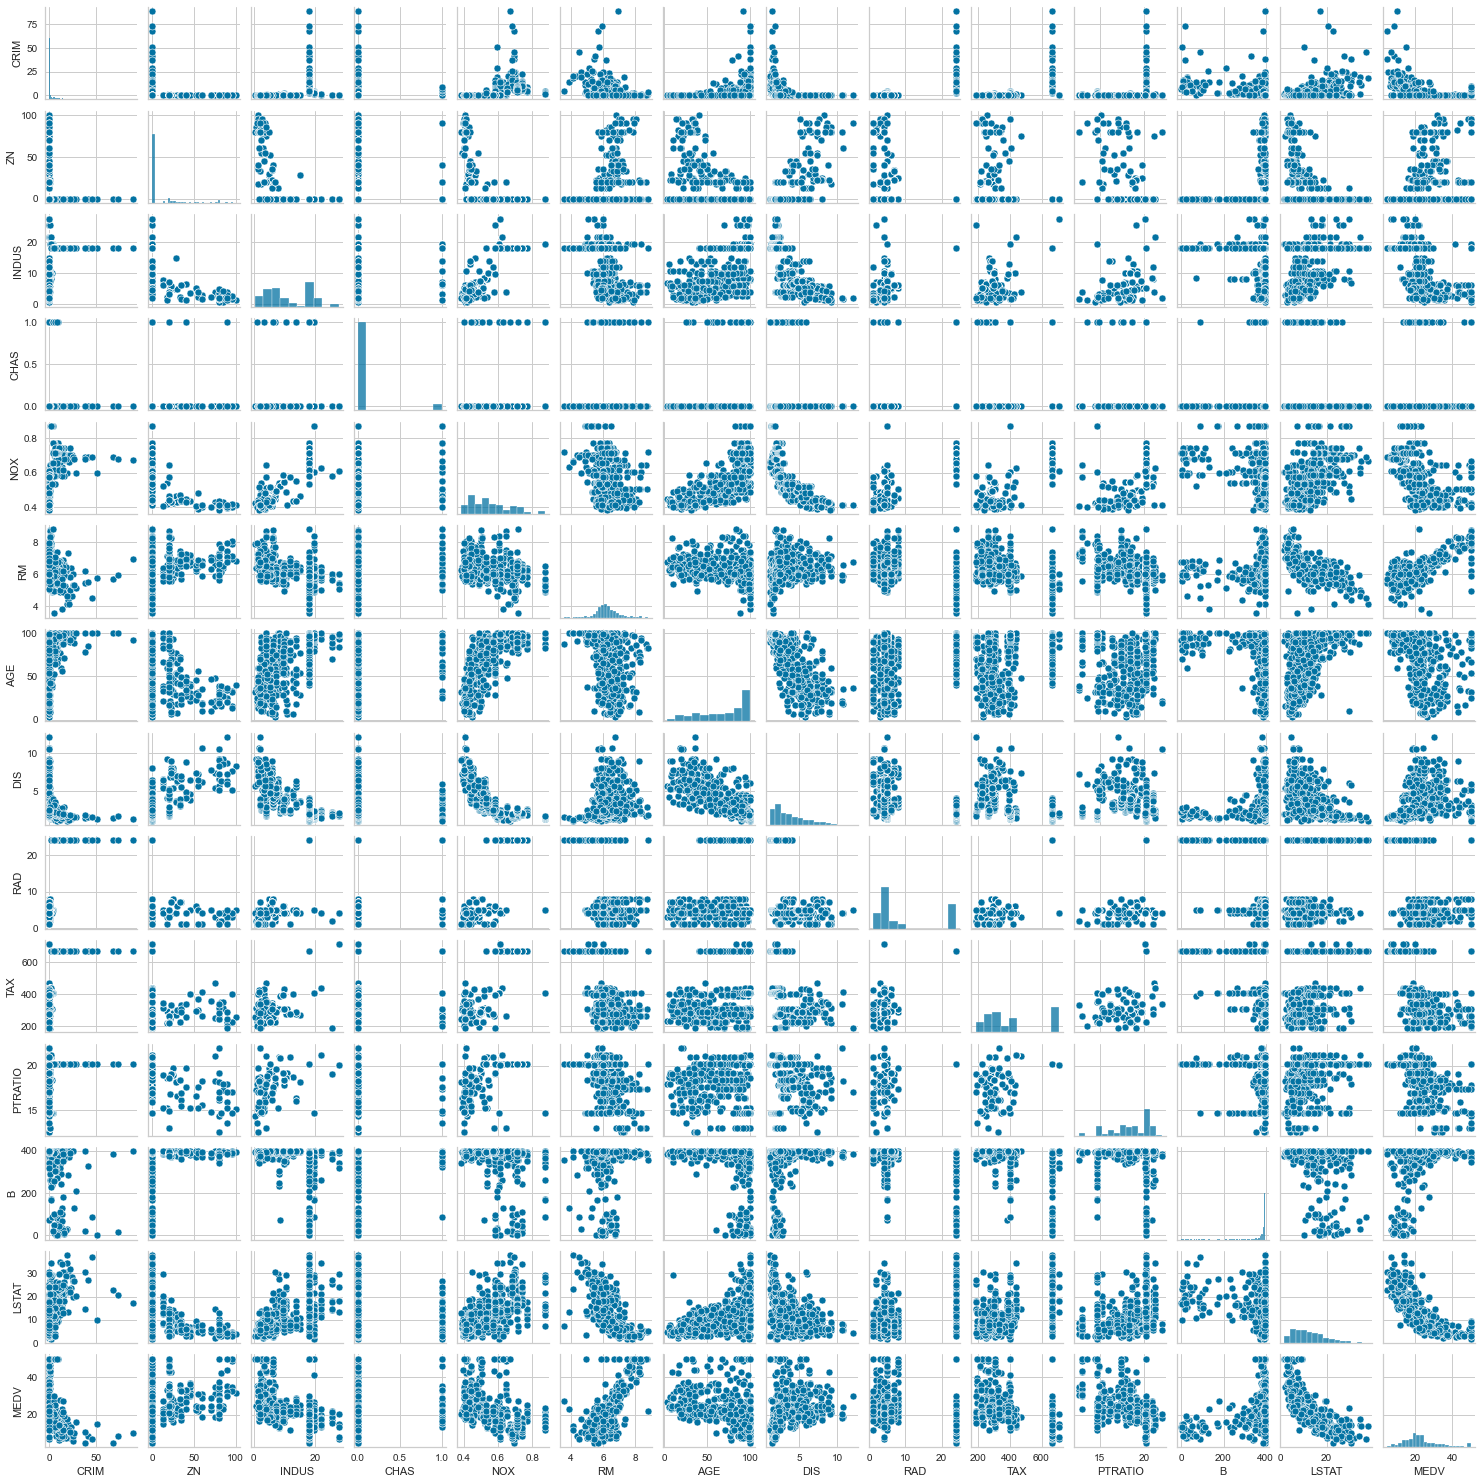

In [58]:
sns.pairplot(df, height= 1.5)
plt.show();

In [59]:
col_study = ["AGE","TAX","B","PTRATIO","LSTAT","MEDV"]

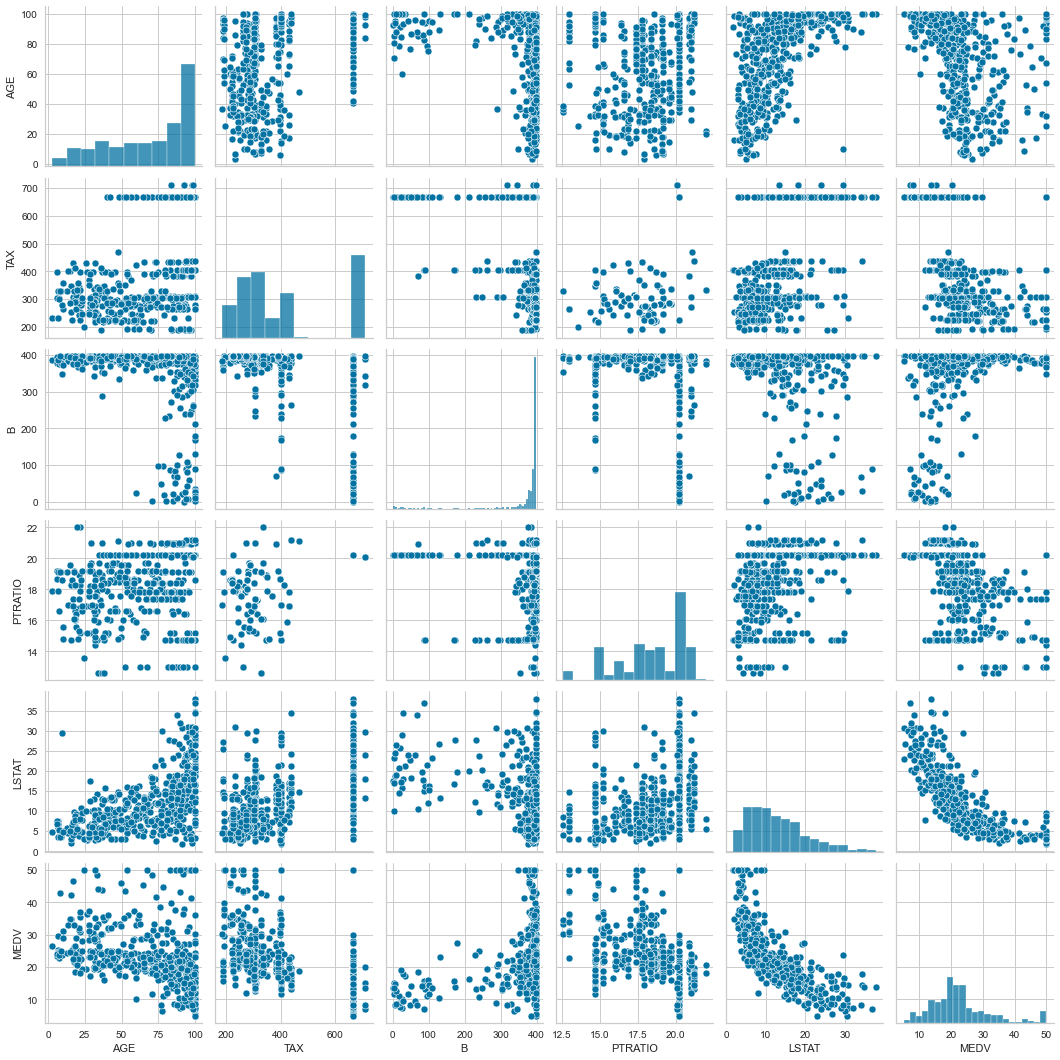

In [60]:
sns.pairplot(df[col_study], height=2.5)
plt.show()

### Correlation Analysis and Feature selection

In [61]:
pd.options.display.float_format = '{:,.2f}'.format

In [62]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


#### From above we can say that column "RM" is highly correlated with "MEDV" which is greater than 0.5 is 0.7
#### so we can say here "RM" is dependant variable and "MEDV" is independant variable.
#### "MEDV" is our target column.
#### target column is always a dependant variable.
#### Dependant variable = "MEDV" (Targer variable)
#### Independant variable = "RM" (Feature variable)

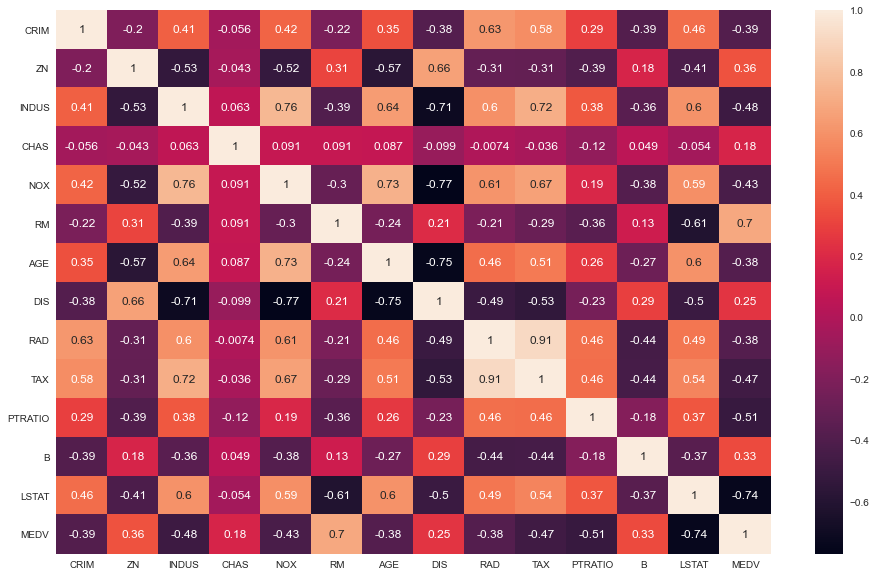

In [63]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

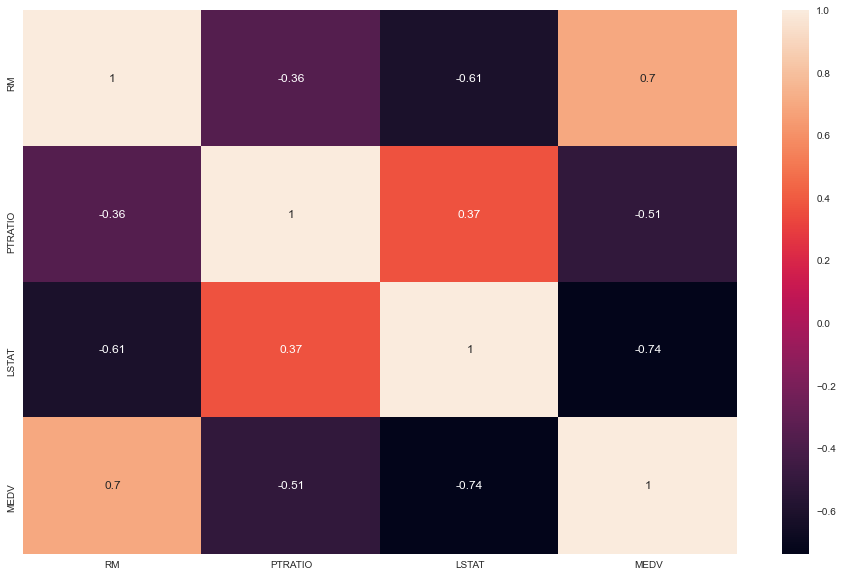

In [64]:
plt.figure(figsize=(16,10))
sns.heatmap(df[["RM","PTRATIO","LSTAT","MEDV"]].corr(), annot=True)
plt.show()

## Linear Regression with scikit Learn

* y = mx+c
* y = Output
* m = slope of regression line
* x = independant variable
* c = Axis intercept

In [65]:
x= df["RM"].values.reshape(-1,1)
x.shape

(506, 1)

In [66]:
y= df["MEDV"].values

### Step to creat ML model
#### 1) Create Model
#### 2) Fit Model (Train data)
#### 3) Predict with test data

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression() # here we create model

In [69]:
model.fit(x,y) # here we fit our data in model

LinearRegression()

In [70]:
model.coef_  # coef is line slope 

array([9.10210898])

In [71]:
model.intercept_ 

-34.67062077643857

G:\Python_1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


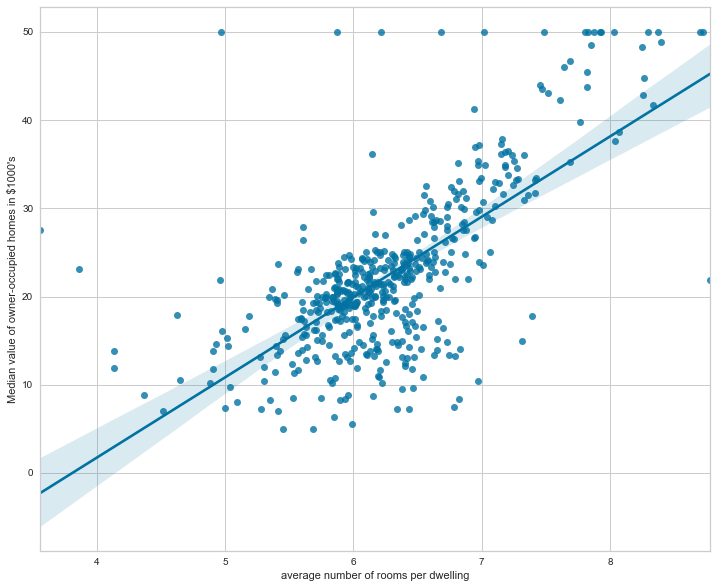

In [72]:
# plotting the line of regression y=mx+c
plt.figure(figsize=(12,10));
sns.regplot(x,y);
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

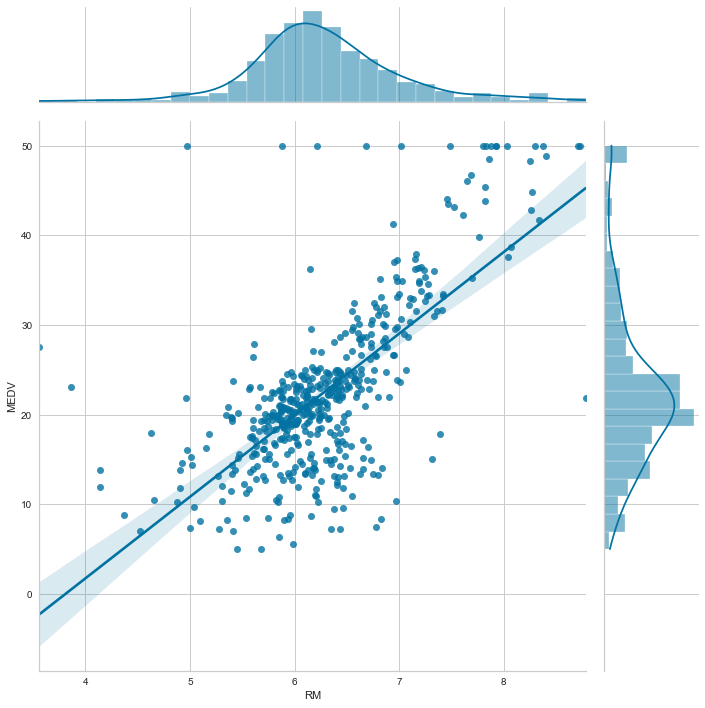

In [73]:
sns.jointplot(x="RM", y="MEDV", data = df, kind="reg", height=10);
plt.show();

### Prediction of MEDV value with ( RM = average number of rooms per dwelling )

In [74]:
model.predict(np.array([5]).reshape(1,-1))

array([10.83992413])

### Prediction of MEDV value with (LSTAT  =  % lower status of the population)

In [75]:
## Step for Linear Regression

# Step 1) selecting a model
from sklearn.linear_model import LinearRegression

# Step 2) Instantiation
ml_2 = LinearRegression()

# step 3) Arrange data
X = df["LSTAT"].values.reshape(-1,1)
y = df["MEDV"].values

# step 4) Model fitting
ml_2.fit(X, y)

# step 5) Predict
ml_2.predict(np.array([15]).reshape(1,-1))

array([20.30310057])

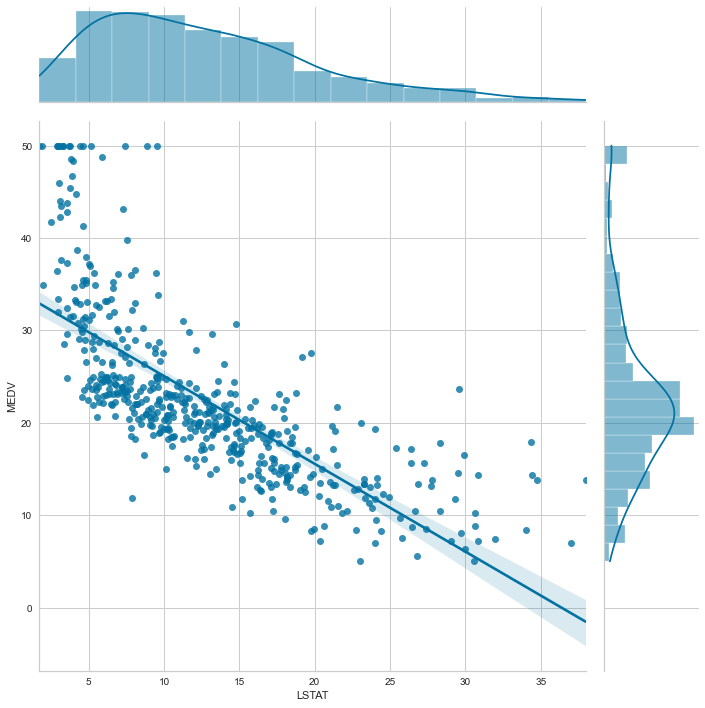

In [76]:
sns.jointplot(x="LSTAT", y="MEDV", data = df, kind="reg", height=10);
plt.show();

* It will give us prediction on latest x , y 

## Handling Outlier and inliers 
## RANdom SAmple Consensus (RANSAC) Algorithm

In [77]:
X = df["RM"].values.reshape(-1,1)
y = df["MEDV"].values

In [78]:
from sklearn.linear_model import RANSACRegressor

In [79]:
ransac = RANSACRegressor() # creating module

In [80]:
ransac.fit(X,y) # fit data in model

RANSACRegressor()

In [81]:
# ransac itself create the inliers and opposite to it is outliers
inlier_mask = ransac.inlier_mask_ # getting inlier from ransac 
outlier_mask = np.logical_not(inlier_mask) # logic for those data which is not inlier is outlier

In [82]:
# create points to plot at points between 3 to 9
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [83]:
line_X = np.arange(3 , 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1))

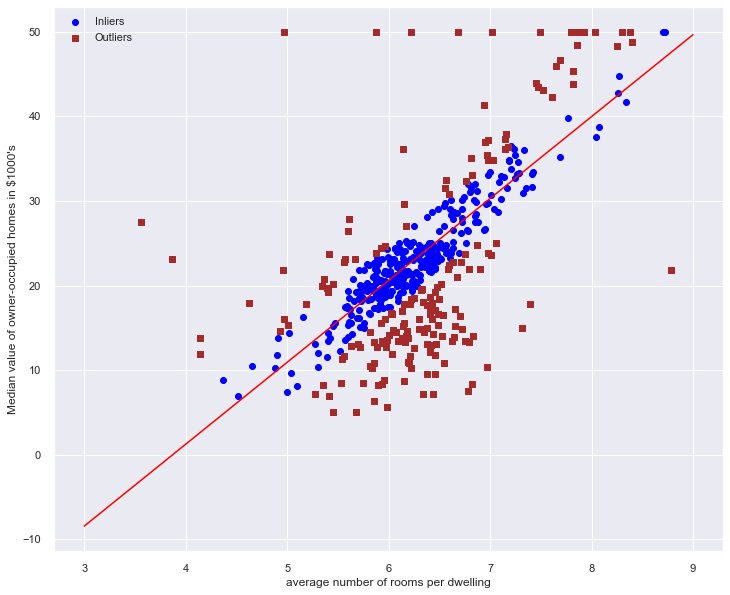

In [84]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));

# ploting for inliers
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')

# ploting for outlier
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')

# line for outlier and inliers
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [85]:
## Here we have to do for LSTAT

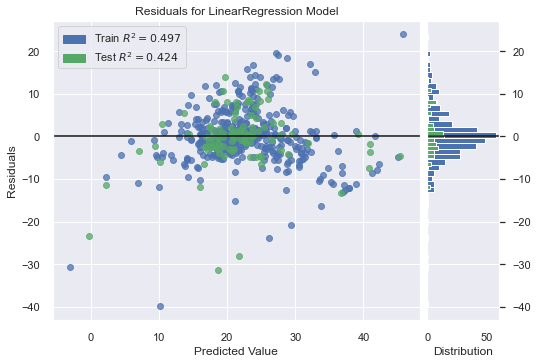

In [86]:
## here we have install package yellowbrick for residual plot
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()
plot_visuals = ResidualsPlot(model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
plot_visuals.fit(X_train, y_train)
plot_visuals.score(X_test, y_test)

plt.legend(loc="upper left")
plot_visuals.show();

### Assumption in Linear Regression

1) Linear relation between feature & target

2) No multicollinearity between features

3) Homoscadasticity = a) error term should not show relation between each other

                   b) error term should not show relation with feature
                      
4) Normal distribution between error 


## Performance Evaluation of Linear Regression

### Performanace measure
1) calculate r square (R^2)

2) root mean square error (RMSE)

3) Mean absolute error (MAE)

4) sum of squared error (SSE)

In [87]:
  from sklearn.model_selection import train_test_split

In [88]:
#X = df["LSTAT"].values.reshape(-1,1)
X = df.iloc[:, :-1].values

In [89]:
y = df["MEDV"].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [92]:
lr = LinearRegression()

In [95]:
lr.fit(X_train,y_train)

LinearRegression()

In [96]:
y_train_pred = lr.predict(X_train)

In [97]:
y_test_pred = lr.predict(X_test)

### Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$
 
* The average value of the Sums of Squared Error cost function

* Useful for comparing different regression models

* For tuning parameters via a grid search and cross-validation

In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [100]:
mean_squared_error(y_test, y_test_pred)

33.448979997676524

### Coefficient of Determination,  𝑅2

$$R^2 = 1 - \frac{SSE}{SST}$$

* SSE: Sum of squared errors

* SST: Total sum of squares

In [101]:
from sklearn.metrics import r2_score

In [102]:
r2_score(y_train, y_train_pred)

0.7730135569264234

In [103]:
r2_score(y_test, y_test_pred)

0.5892223849182509